<a href="https://colab.research.google.com/github/mohammadRahimi1993/BigData/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. DataSet Understand**

# 1.1 import Libraries


In [1]:
# Load Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)
from matplotlib.colors import ListedColormap
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import stats
from scipy.stats import norm
from scipy.stats import probplot
import scipy as stat
from scipy.stats import skew
from scipy import stats
from sklearn.preprocessing import PowerTransformer
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA


# 1.2 import Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DataSet/breast-final_csv.csv")
df = pd.DataFrame(df)
df.head(10)

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign
5,8,10,10,8,7,10.0,9,7,1,malignant
6,1,1,1,1,2,10.0,3,1,1,benign
7,2,1,2,1,2,1.0,3,1,1,benign
8,2,1,1,1,2,1.0,1,1,5,benign
9,4,2,1,1,2,1.0,2,1,1,benign


# 1.3 Descriptive Analysis

In [3]:
describe = df.describe().T
print(describe)

                       count      mean       std  min  25%  50%  75%   max
Clump_Thickness        699.0  4.417740  2.815741  1.0  2.0  4.0  6.0  10.0
Cell_Size_Uniformity   699.0  3.134478  3.051459  1.0  1.0  1.0  5.0  10.0
Cell_Shape_Uniformity  699.0  3.207439  2.971913  1.0  1.0  1.0  5.0  10.0
Marginal_Adhesion      699.0  2.806867  2.855379  1.0  1.0  1.0  4.0  10.0
Single_Epi_Cell_Size   699.0  3.216023  2.214300  1.0  2.0  2.0  4.0  10.0
Bare_Nuclei            683.0  3.544656  3.643857  1.0  1.0  1.0  6.0  10.0
Bland_Chromatin        699.0  3.437768  2.438364  1.0  2.0  3.0  5.0  10.0
Normal_Nucleoli        699.0  2.866953  3.053634  1.0  1.0  1.0  4.0  10.0
Mitoses                699.0  1.589413  1.715078  1.0  1.0  1.0  1.0  10.0


# 1.4 Checking Skewness Basically

In [4]:
def check_skewness(dataframe):

    global describe
    
    for i in range(describe.shape[1]):
        mean = round(describe.iloc[1,i],3)
        median = round(describe.iloc[5,i],3)
    
        if mean > median:
            print("Positive Skewness\t:\t{}\t".format(describe.columns[i]))
        elif mean == median:
            print("No Skew          \t:\t{}\t".format(describe.columns[i]))
        else:
            print("Negative Skewness\t:\t{}\t".format(describe.columns[i]))
            
check_skewness(df)

Positive Skewness	:	count	
Negative Skewness	:	mean	
Negative Skewness	:	std	
No Skew          	:	min	
No Skew          	:	25%	
No Skew          	:	50%	
Negative Skewness	:	75%	
No Skew          	:	max	


# 1.5 Missing Values

In [5]:
#df.info()
def Missing_Values_Table(df):
    missing_value = df.isnull().sum()
    missing_value_percent = 100*df.isnull().sum()/len(df)
    missing_value_table = pd.concat([missing_value,missing_value_percent],axis = 1)
    missing_value_table__ = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Percent'})
    return missing_value_table__

Missing_Values_Table(df)

,Missing Values,% Percent
Clump_Thickness,0,0.000000
Cell_Size_Uniformity,0,0.000000
Cell_Shape_Uniformity,0,0.000000
Marginal_Adhesion,0,0.000000
Single_Epi_Cell_Size,0,0.000000
Bare_Nuclei,16,2.288984
Bland_Chromatin,0,0.000000
Normal_Nucleoli,0,0.000000
Mitoses,0,0.000000
Class,0,0.000000


In [6]:
df = df.rename(columns = {"Class":"Target"})
df["Target"] = [ 1 if i.strip() == "benign" else 0 for i in df["Target"]]
df.head(5)

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Target
0,5,1,1,1,2,1.0,3,1,1,1
1,5,4,4,5,7,10.0,3,2,1,1
2,3,1,1,1,2,2.0,3,1,1,1
3,6,8,8,1,3,4.0,3,7,1,1
4,4,1,1,3,2,1.0,3,1,1,1


# 1.6 Correlation Matrix

Text(0.5, 1.0, 'Correlation Features')

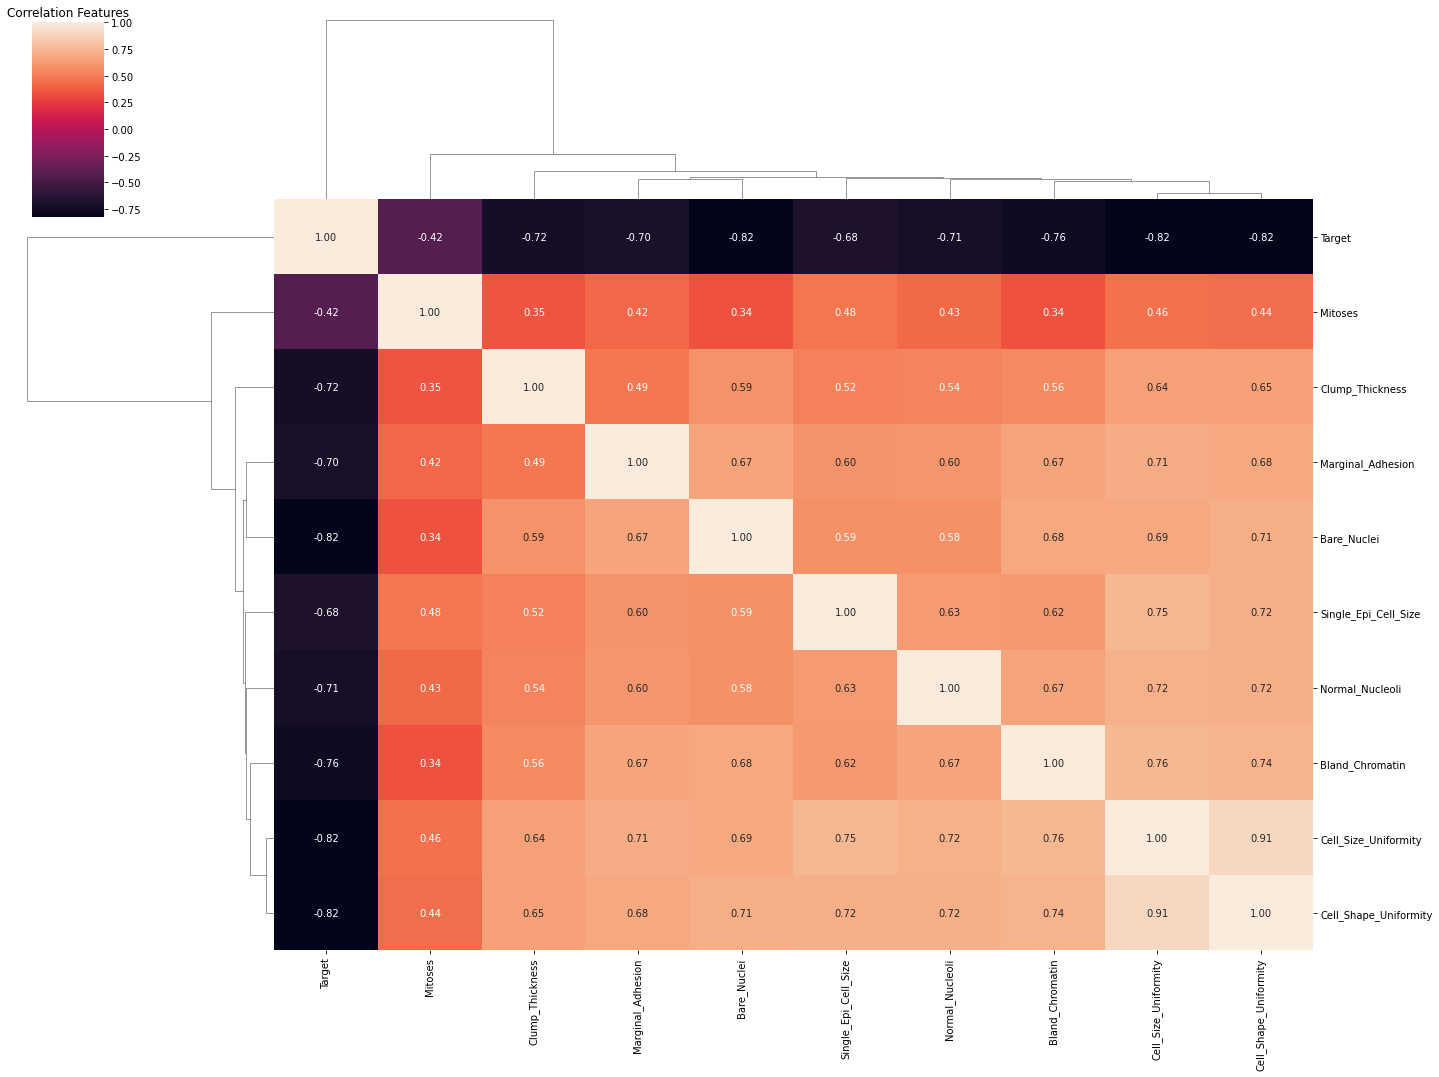

In [7]:
# correlation:
corr_matrix = df.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f",figsize=(20,15))
plt.title("Correlation Features")

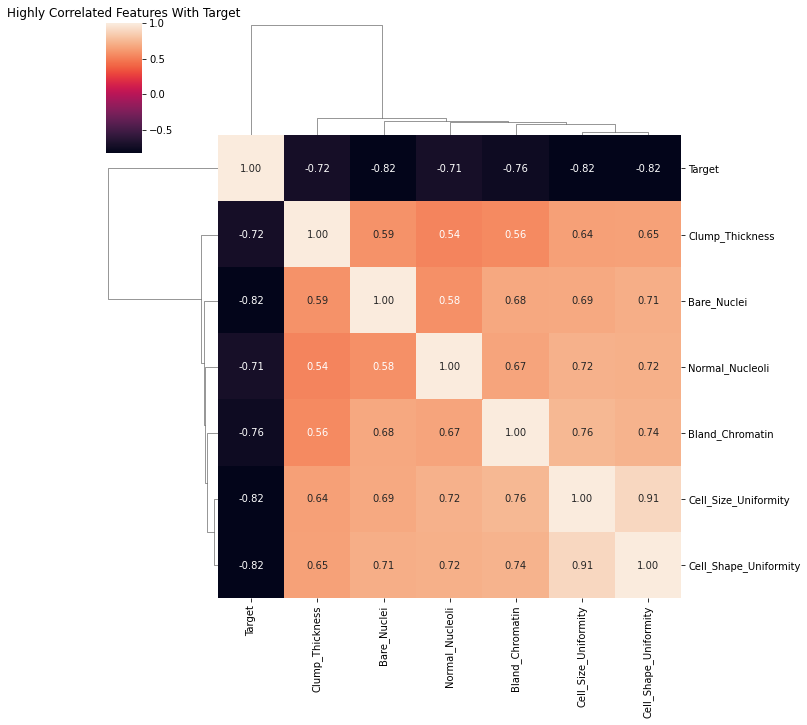

In [8]:
thrs = 0.7
filt = np.abs(corr_matrix["Target"])>=thrs
correlation_features = corr_matrix.columns[filt].tolist()
sns.clustermap(df[correlation_features].corr(),annot = True, fmt = ".2f")
plt.title("Highly Correlated Features With Target")
plt.show()

# 1.7 Pair Plot

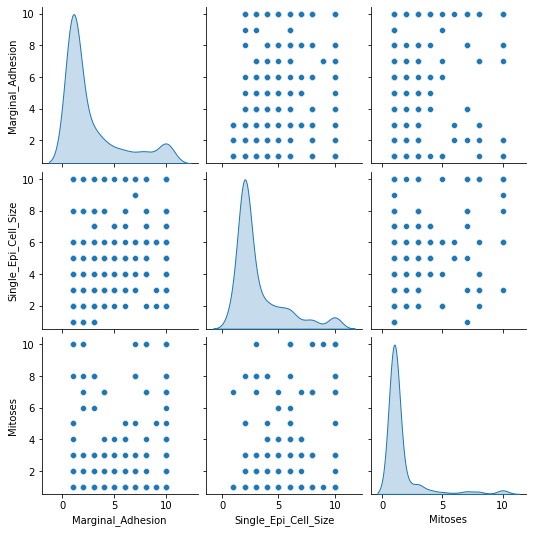

In [9]:
# pair plot
thrs = 0.71
filt1 = np.abs(corr_matrix["Target"])<=thrs
correlation_features = corr_matrix.columns[filt1].tolist()
sns.pairplot(df[correlation_features], diag_kind="kde")
plt.show()

# 1.8 Box Plot (we can see outliers)

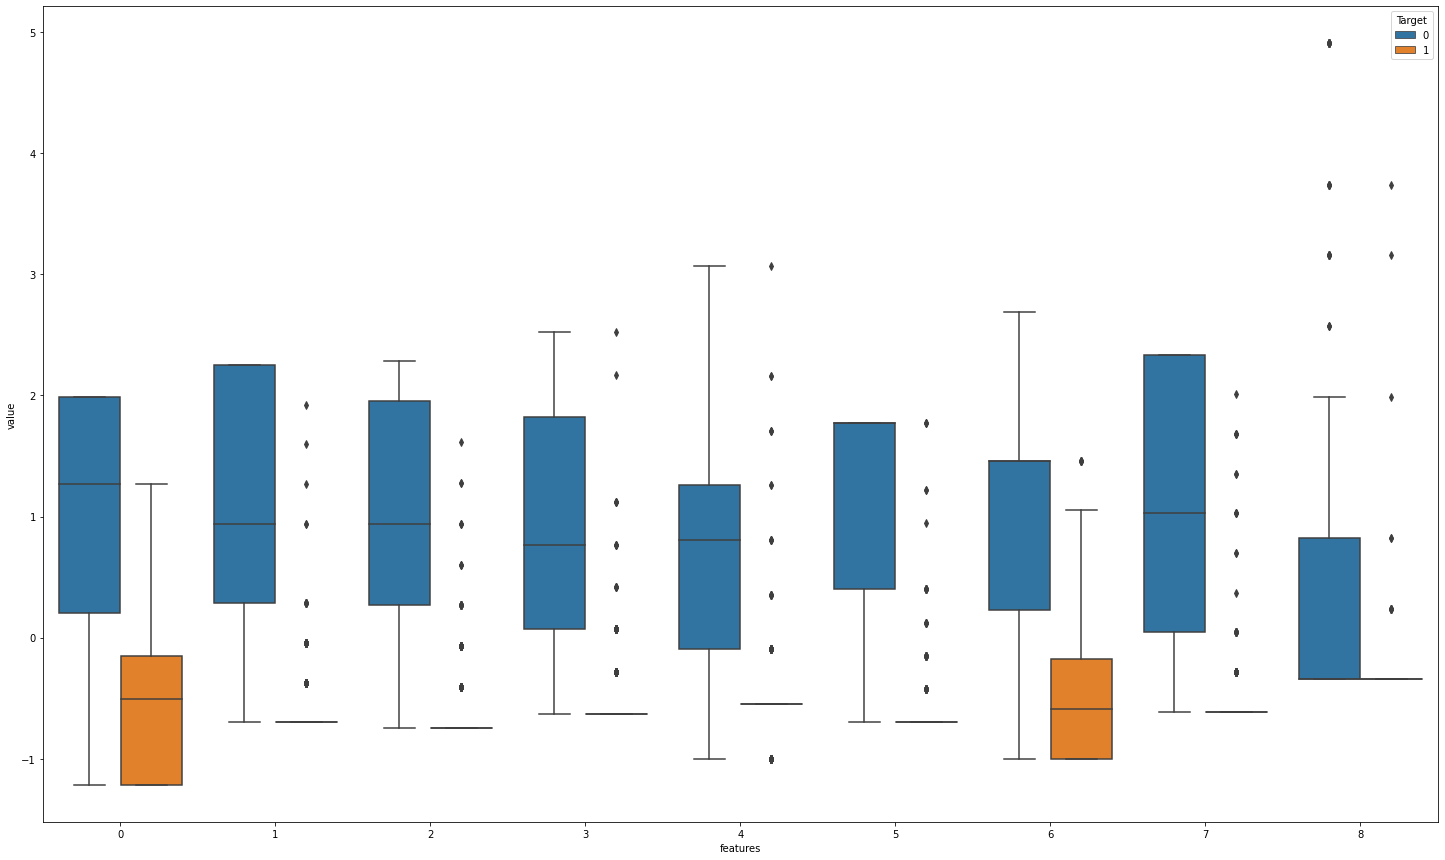

In [10]:
# We only used StandardScaler for visualization.

Y_visualization = df["Target"]
X_visualization = df.drop("Target",axis = 1)

scaler_visualization = StandardScaler()
X_visualization = scaler_visualization.fit_transform(X_visualization)

df_visualization = pd.DataFrame(X_visualization)
df_visualization["Target"] = Y_visualization


df_melted = pd.melt(df_visualization,id_vars="Target",var_name="features",value_name="value")
plt.figure(figsize=(25,15))
sns.boxplot(x="features",y="value",hue="Target",data=df_melted)
plt.show()

# 1.9 Count Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



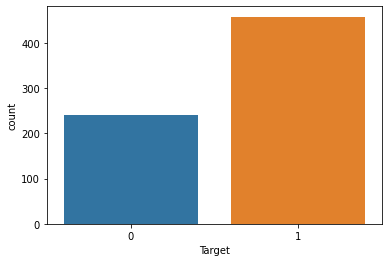

In [11]:
sns.countplot(df["Target"])
plt.show()

# **2- Data Preparation**

# 2-1 Fill Missing Values With Mode

In [12]:
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].mode()[0], inplace=True)
df.isnull().any()

Clump_Thickness          False
Cell_Size_Uniformity     False
Cell_Shape_Uniformity    False
Marginal_Adhesion        False
Single_Epi_Cell_Size     False
Bare_Nuclei              False
Bland_Chromatin          False
Normal_Nucleoli          False
Mitoses                  False
Target                   False
dtype: bool

# 2-2 Outlier Detection (LOF)

In [13]:
y = df["Target"]
X = df.drop(["Target"],axis=1)
columns = X.columns.tolist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



We have 324 Outlier and 375 Inlier Values


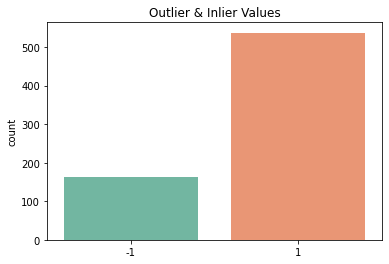

In [14]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)
outlier = len(y_pred)-(y_pred.sum())
inlier = len(y_pred)-outlier

print("We have {} Outlier and {} Inlier Values".format(outlier,inlier))
sns.countplot(y_pred,palette="Set2")
plt.title("Outlier & Inlier Values")
plt.show()

In [15]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [16]:
np.abs(outlier_score["score"]).sort_values(ascending=False).head(10)

689    5.031469e+10
108    1.660241e+10
318    1.590123e+10
75     1.589282e+10
13     1.575293e+10
110    1.329239e+10
430    1.312356e+10
147    1.184477e+10
72     1.170182e+10
647    1.167846e+10
Name: score, dtype: float64

In [17]:
thresh = -2.5
filt = outlier_score["score"] < thresh
outlier_index = outlier_score[filt].index.tolist()

# Radius for our outliers
Normal_Nucleoli = (X_score.max()-X_score)/(X_score.max()-X_score.min())
outlier_score["Normal_Nucleoli"] = Normal_Nucleoli

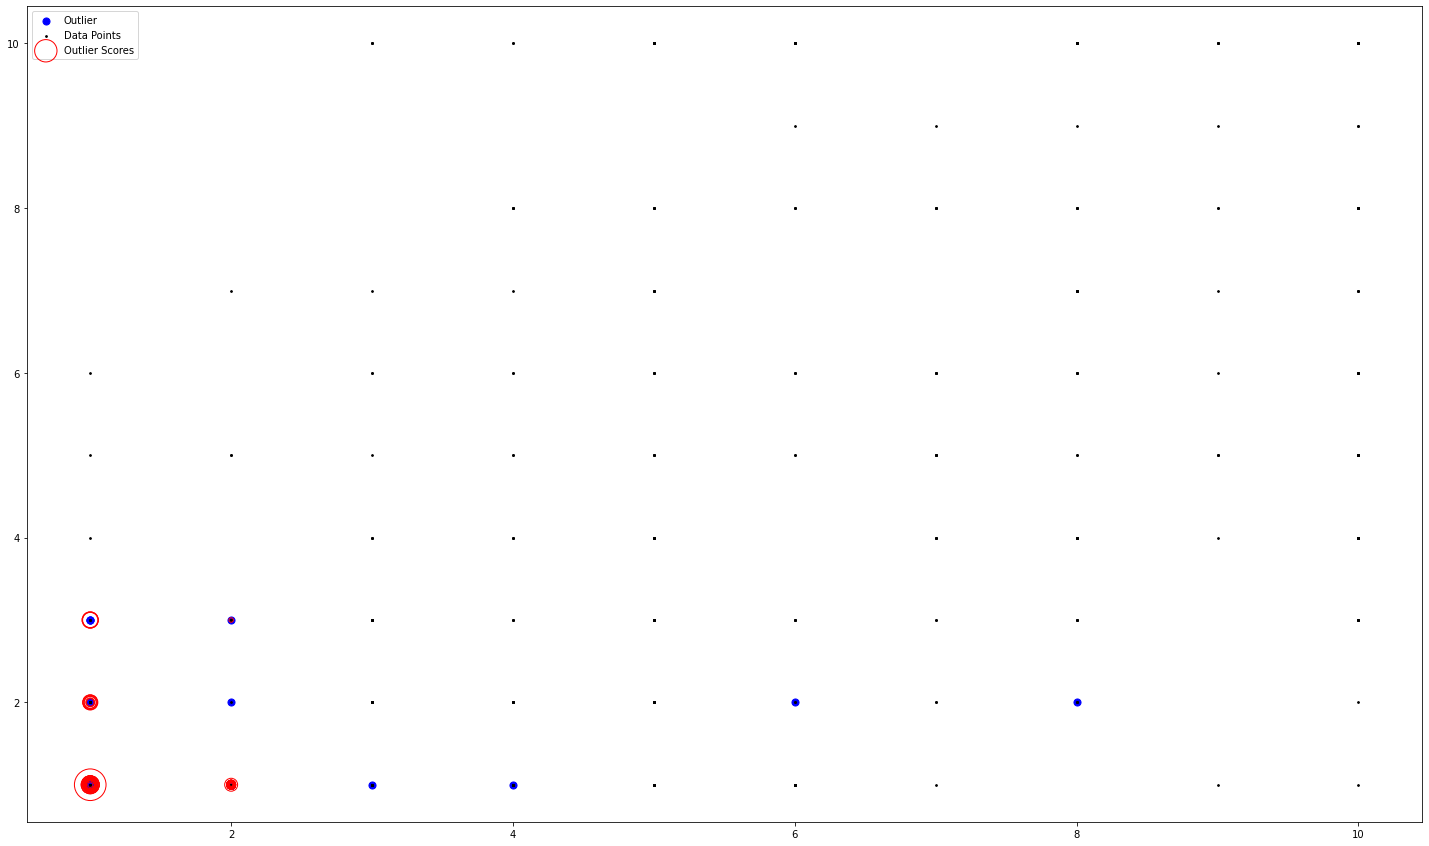

In [18]:
plt.figure(figsize=(25,15))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,1],color = "blue",s=50, label = "Outlier")
plt.scatter(X.iloc[:,0],X.iloc[:,1],color = "k",s=3, label = "Data Points")
plt.scatter(X.iloc[:,0],X.iloc[:,1],color = "k",s=1000*Normal_Nucleoli,edgecolors="r",facecolors="none", label = "Outlier Scores")
plt.legend()
plt.show()

# 2.3 Skewness & Data Transformation & PowerTransformer

In [19]:
y = df["Target"]
X = df.drop(["Target"],axis=1)
columns = X.columns.tolist()
X.head(5)

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [20]:
skewed = X.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skewed, columns=["skewness"])
print("Before:",skewness)

pt = PowerTransformer(standardize=False, copy=False)
pt.fit_transform(X["Mitoses"].values.reshape(-1, 1))

skewed = X.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skewed, columns=["skewness"])
print("After:",skewness)

Before:                        skewness
Mitoses                3.553012
Single_Epi_Cell_Size   1.708495
Marginal_Adhesion      1.521195
Normal_Nucleoli        1.419207
Cell_Size_Uniformity   1.230489
Cell_Shape_Uniformity  1.159364
Bland_Chromatin        1.097607
Bare_Nuclei            1.023146
Clump_Thickness        0.591586
After:                        skewness
Mitoses                3.553012
Single_Epi_Cell_Size   1.708495
Marginal_Adhesion      1.521195
Normal_Nucleoli        1.419207
Cell_Size_Uniformity   1.230489
Cell_Shape_Uniformity  1.159364
Bland_Chromatin        1.097607
Bare_Nuclei            1.023146
Clump_Thickness        0.591586


# 2.4 Create Train and Test Dataset

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 2.5 Standardization

In [22]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test) 

# **3. Modeling and Evalution**

# 3.1 PCA

In [23]:
scaler2 = RobustScaler()
x_scaled = scaler2.fit_transform(X)

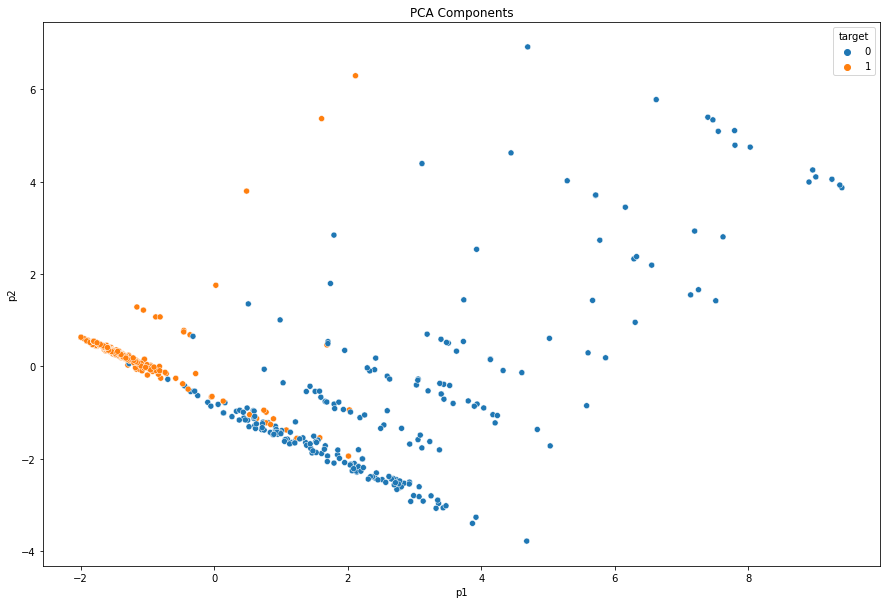

In [24]:
pca = PCA(n_components=2,random_state=42)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
pca_df = pd.DataFrame(x_pca,columns=["p1", "p2"])
pca_df["target"] = y

plt.figure(figsize=(15,10))
sns.scatterplot(x="p1", y="p2", hue="target",data=pca_df)
plt.title("PCA Components")
plt.show()

In [25]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(x_pca,y,test_size=0.33,random_state=42)

# 3.2 K Nearest Neighbors model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(x_train,y_train)

KNN_predictions_train = KNN_model.predict(x_train)
KNN_predictions_test = KNN_model.predict(x_test)

acc_test = accuracy_score(y_test, KNN_predictions_test)
acc_train = accuracy_score(y_train, KNN_predictions_train)
print("Test Score : {}, Train Score : {}".format(acc_test, acc_train))

print("Conf Matrix Train\n", confusion_matrix(y_train,KNN_predictions_train))
print(classification_report(y_train,KNN_predictions_train))
print('\n')
print("Conf Matrix Train\n", confusion_matrix(y_test,KNN_predictions_test))
print(classification_report(y_test,KNN_predictions_test))

Test Score : 0.9523809523809523, Train Score : 1.0
Conf Matrix Train
 [[164   0]
 [  0 304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       304

    accuracy                           1.00       468
   macro avg       1.00      1.00      1.00       468
weighted avg       1.00      1.00      1.00       468



Conf Matrix Train
 [[ 68   9]
 [  2 152]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        77
           1       0.94      0.99      0.97       154

    accuracy                           0.95       231
   macro avg       0.96      0.94      0.95       231
weighted avg       0.95      0.95      0.95       231



# 3.2 K Nearest Neighbors model & PCA & Fine-tune Hyper-Parameter

In [27]:
def KNN_Best_params(x_train,x_test,y_train,y_test):

    k_range = list(range(1,31))
    weight_potions = ["uniform","distance"]
    print()
    param_grid = {'n_neighbors': k_range, 'weights': weight_potions}

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)

    print("Optimization parameters: {} ".format(grid.best_params_))
    print()

    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)

    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print("Test accuracy : {}, Train accuracy : {}".format(acc_test, acc_train))
    print()

    print('\n')
    print("Conf Matrix Train\n", cm_train)
    print(classification_report(y_train,y_pred_train))
    print('\n')
    print("Conf Matrix Test\n", cm_test)
    print(classification_report(y_test,y_pred_test))

    return grid
grid_knn_pca = KNN_Best_params(x_train_pca,x_test_pca,y_train_pca,y_test_pca)


Optimization parameters: {'n_neighbors': 9, 'weights': 'uniform'} 

Test accuracy : 0.9696969696969697, Train accuracy : 0.9594017094017094



Conf Matrix Train
 [[158   6]
 [ 13 291]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       164
           1       0.98      0.96      0.97       304

    accuracy                           0.96       468
   macro avg       0.95      0.96      0.96       468
weighted avg       0.96      0.96      0.96       468



Conf Matrix Test
 [[ 75   2]
 [  5 149]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        77
           1       0.99      0.97      0.98       154

    accuracy                           0.97       231
   macro avg       0.96      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231



# 3.3 Support Vector Classifier model

In [42]:
# x_train_pca,x_test_pca,y_train_pca,y_test_pca
from sklearn.svm import SVC
SV_model = SVC()
SV_model.fit(x_train_pca,y_train_pca)
predictions = SV_model.predict(x_test_pca)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test_pca,predictions))


[[ 76   1]
 [  4 150]]


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        77
           1       0.99      0.97      0.98       154

    accuracy                           0.98       231
   macro avg       0.97      0.98      0.98       231
weighted avg       0.98      0.98      0.98       231



# 3.3 Support Vector Classifier model & PCA & Fine-tun Hyperparameter

In [48]:
from sklearn.svm import SVC
svc_params = {"C": np.arange(1,10)}
svc = SVC(kernel = "linear")
svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )
svc_cv_model.fit(x_train_pca, y_train_pca)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [49]:
predictions = svc_cv_model.predict(x_test_pca)
print(confusion_matrix(y_test_pca,predictions))
print('\n')
print(classification_report(y_test_pca,predictions))

[[ 73   4]
 [  2 152]]


              precision    recall  f1-score   support

           0       0.97      0.95      0.96        77
           1       0.97      0.99      0.98       154

    accuracy                           0.97       231
   macro avg       0.97      0.97      0.97       231
weighted avg       0.97      0.97      0.97       231



# 3.4 LOGISTIC REGRESSION

In [30]:
# logistic regression

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=42,max_iter=10000)
logr.fit(x_train,y_train)

y_pred_logr_test = logr.predict(x_test)

logr_cm_test = confusion_matrix(y_test,y_pred_logr_test)
logr_acc = metrics.accuracy_score(y_test, y_pred_logr_test)
print("Test accuracy is: ", logr_acc)

print('\n')
print("Conf Matrix Test\n", logr_cm_test)
print(classification_report(y_test,y_pred_logr_test))

Test accuracy is:  0.9653679653679653


Conf Matrix Test
 [[ 71   6]
 [  2 152]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        77
           1       0.96      0.99      0.97       154

    accuracy                           0.97       231
   macro avg       0.97      0.95      0.96       231
weighted avg       0.97      0.97      0.97       231



# 3.4 LOGISTIC REGRESSION & PCA & Fine-tune hyperparameter

In [31]:
from sklearn.linear_model import LogisticRegression
def Logistic_Regression_Best_params(x_train,x_test,y_train,y_test):

    C = np.logspace(-4, 4, 50)
    penalty = ['l1', 'l2']
    max_iter = list(range(1000, 2000, 1000))
    random_state = 42
    print("*************************************************************")
    param_grid = {"C": C, "penalty": penalty, "max_iter": max_iter}

    logr = LogisticRegression(random_state=random_state)
    grid = GridSearchCV(logr, param_grid, cv=10, scoring="accuracy")
    grid.fit(x_train, y_train)

    print("Optimizatio parameters are : {} ".format(grid.best_params_))
    print("*************************************************************")

    logr = LogisticRegression(**grid.best_params_)
    logr.fit(x_train, y_train)

    y_pred_test = logr.predict(x_test)
    y_pred_train = logr.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    print("Test accuracy : {}, Train accuracy : {}".format(acc_test, acc_train))

    print('\n')
    print("Conf Matrix Train\n", cm_train)
    print(classification_report(y_train,y_pred_train))
    print('\n')
    print("Conf Matrix Test\n", cm_test)
    print(classification_report(y_test,y_pred_test))


Logistic_Regression_Best_params(x_train_pca,x_test_pca,y_train_pca,y_test_pca)

*************************************************************
Optimizatio parameters are : {'C': 0.5689866029018293, 'max_iter': 1000, 'penalty': 'l2'} 
*************************************************************
Test accuracy : 0.961038961038961, Train accuracy : 0.9636752136752137


Conf Matrix Train
 [[156   8]
 [  9 295]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       164
           1       0.97      0.97      0.97       304

    accuracy                           0.96       468
   macro avg       0.96      0.96      0.96       468
weighted avg       0.96      0.96      0.96       468



Conf Matrix Test
 [[ 72   5]
 [  4 150]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        77
           1       0.97      0.97      0.97       154

    accuracy                           0.96       231
   macro avg       0.96      0.95      0.96       231
weighted avg       0.96     

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Sol

# 3.5 Decision Tree

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

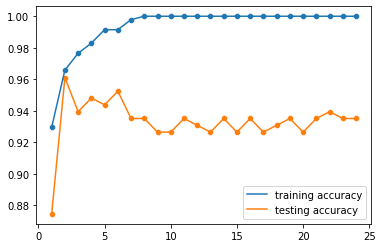

In [32]:
from sklearn.tree import DecisionTreeClassifier

depth = range(1,25)
testing_accuracy = []
training_accuracy = []
score = 0

for i in depth:
    tree = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    tree.fit(x_train, y_train)
    
    y_predict_train = tree.predict(x_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(x_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_depth = i
sns.lineplot(depth, training_accuracy)
sns.scatterplot(depth, training_accuracy)
sns.lineplot(depth, testing_accuracy)
sns.scatterplot(depth, testing_accuracy)
plt.legend(['training accuracy', 'testing accuracy'])

In [33]:
print('This is the best depth for Decision Tree Classifier: ', best_depth, '\nAccuracy score is: ', score)
tree = DecisionTreeClassifier(max_depth = best_depth, criterion = 'entropy')
tree.fit(x_train, y_train)
    
y_predict_train = tree.predict(x_train)
training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
y_predict_test = tree.predict(x_test)
acc_score = accuracy_score(y_test,y_predict_test)
print(classification_report(y_test,y_predict_test))

This is the best depth for Decision Tree Classifier:  2 
Accuracy score is:  0.961038961038961
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        77
           1       0.97      0.97      0.97       154

    accuracy                           0.96       231
   macro avg       0.95      0.96      0.96       231
weighted avg       0.96      0.96      0.96       231



# 3.5 Decision Tree & PCA & Fine-tune

In [34]:
from sklearn.model_selection import StratifiedKFold
tree = DecisionTreeClassifier(max_depth = 3, random_state = 3030)
hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_leaf': [3, 9, 13, 15, 17],
    'class_weight': ['list', 'dict', 'balanced'],
    'random_state': [3030]
}

grid = GridSearchCV(
                tree,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid.fit(x_train_pca, y_train_pca)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


1000 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 220, in fit
    expanded_class_weight = compute_sample_weight(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/utils/c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=3030),
             n_jobs=-1,
             param_grid={'class_weight': ['list', 'dict', 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [3, 9, 13, 15, 17],
                         'random_state': [3030],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [35]:
print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.9934426229508198
best param {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 13, 'random_state': 3030, 'splitter': 'random'}


# 3.6 Bagging Model

In [53]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=tree,
                       n_estimators=100,
                       random_state=0)
bag = bag.fit(x_train, y_train)

y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print(f"Bagging train/test accuracies: {bag_train: .3f}/{bag_test: .3f}")

Bagging train/test accuracies:  0.981/ 0.957


# 3.6 Bagging Model & PCA

In [54]:
bag = BaggingClassifier(base_estimator=tree,
                       n_estimators=100,
                       random_state=0)
bag = bag.fit(x_train_pca, y_train_pca)

y_train_pred = bag.predict(x_train_pca)
y_test_pred = bag.predict(x_test_pca)

bag_train = accuracy_score(y_train_pca , y_train_pred)
bag_test = accuracy_score(y_test_pca, y_test_pred)
print(f"Bagging train/test accuracies: {bag_train: .3f}/{bag_test: .3f}")

Bagging train/test accuracies:  0.970/ 0.970
